In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data_complete = pd.merge(city_data_to_load_df, ride_data_to_load_df, how="left", on=["city", "city"])

# Display the data table for preview
city_ride_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

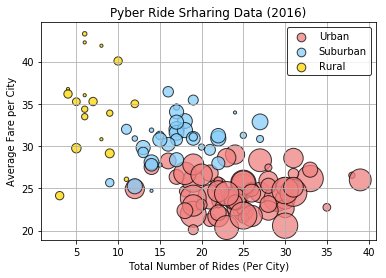

In [5]:
# Organize
by_city = city_ride_data_complete.groupby("city")
avg_fare = by_city["fare"].mean()
ride_count = by_city["ride_id"].count()
driver_count = by_city["driver_count"].mean()
city_types = city_data_to_load_df.set_index("city")["type"]

city_info = pd.DataFrame({"Number of Rides": ride_count,
                          "Average Fare": avg_fare,
                          "Number of Drivers": driver_count,
                          "Type of City": city_types})

city_info.sort_values("Number of Drivers", ascending = False)

# City categories
urban = city_info[city_info['Type of City'] == 'Urban']
suburban = city_info[city_info['Type of City'] == 'Suburban']
rural = city_info[city_info['Type of City'] == 'Rural']


# Color scheme dictionary and preview
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

# Color Dictionary 
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

# Scatter plots for each city type
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)

# Print scatter plot
plt.title('Pyber Ride Srharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare per City')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.grid()
plt.show()


## Total Fares by City Type

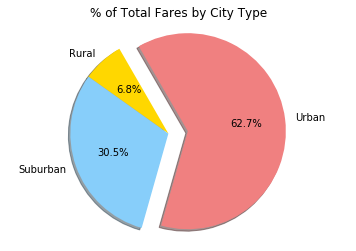

In [6]:
# Calculate Type Percents
by_type = city_ride_data_complete.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

# Build Pie Chart
labels = fare_sum.index

# Colors
colors = [city_color[n] for n in labels]
explode = [0 , 0, .2]


# Tell matplotlib to create a pie chart based upon the above data
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

#Title 
plt.title('% of Total Fares by City Type')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.show()

## Total Rides by City Type

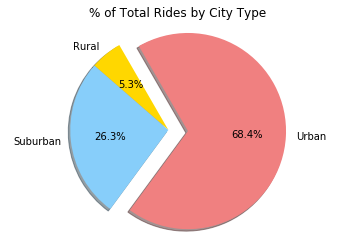

In [7]:
#total ride by city
ride_sum = by_type.count()['ride_id']

# Build Pie Chart
labels = ride_sum.index

# Colors
colors = [city_color[n] for n in labels]
explode = [0 , 0, .2]


# Tell matplotlib to create a pie chart based upon the above data
plt.pie(ride_sum, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

#Title 
plt.title('% of Total Rides by City Type')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.show()

## Total Drivers by City Type

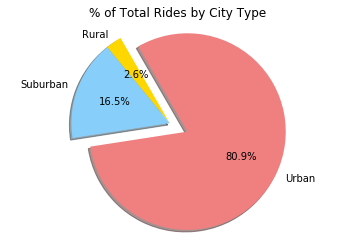

In [9]:
#total ride by city
driver_sum = city_data_to_load_df.groupby('type').sum()['driver_count']

# Build Pie Chart
labels = driver_sum.index

# Colors
colors = [city_color[n] for n in labels]
explode = [0 , 0, .2]


# Tell matplotlib to create a pie chart based upon the above data
plt.pie(driver_sum, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

#Title 
plt.title('% of Total Rides by City Type')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.show()